### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)
%load_ext autoreload
%autoreload 2

I am being executed!


***

# 1) Load data into Python



In [2]:
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [18]:
control_group = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,16] #In this example: Tg negative rats

exp_group = [17,18,19,20,21,22,23,24] #In this example: Tg positive rats

third_group = [25,26,27,28,29,30,31,32]

group_names = {0: 'control_group',
              1: 'exp_group', 
              2: 'third_group'} 

group_list = [control_group, exp_group, third_group]

title = '' #for plotting

startsess = 29 #first session you would like to include in figures
endsess = 30 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [4]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

### Drop/edit session numbers

In [5]:
df2 = rgt.drop_sessions(df, [28])

### Check that you dropped/edited the desired session(s)

In [6]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  29          80.1
         2020-10-10  

## Data processing

### Calculate variables for each rat


In [7]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum 

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,1.077168,1.286471,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.607407,1.387458,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,1.023333,1.026522,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,1.263699,1.133429,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.807188,1.098889,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,1.055714,1.061136,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.839412,0.929643,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.791649,1.724421,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.748000,0.711429,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.406731,1.543853,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247


In [8]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

,Subject,Session,P1,P2,P3,P4,risk,collect_lat,choice_lat,omit,trial,prem
0,1,29,90.839695,0.000000,8.396947,0.763359,81.679389,1.077168,0.638321,0,131.1,26.404494
1,1,30,83.064516,0.000000,16.935484,0.000000,66.129032,1.286471,0.655323,0,124.0,24.848485
2,2,29,9.333333,65.333333,10.666667,14.666667,49.333333,1.607407,1.057733,1,76.1,30.275229
3,2,30,4.938272,76.543210,0.000000,18.518519,62.962963,1.387458,1.249012,0,81.0,33.606557
4,3,29,2.173913,8.695652,56.521739,32.608696,-78.260870,1.023333,2.833261,3,49.0,3.921569


In [9]:
df_long = rgt.get_risk_status_long(df_long)
df_long = rgt.get_group_long(df_long, group_list)
df_long

,Subject,Session,P1,P2,P3,P4,risk,collect_lat,choice_lat,omit,trial,prem,mean_risk,risk_status,group
0,1,29,90.839695,0.000000,8.396947,0.763359,81.679389,1.077168,0.638321,0,131.1,26.404494,73.904211,1.0,1.0
1,1,30,83.064516,0.000000,16.935484,0.000000,66.129032,1.286471,0.655323,0,124.0,24.848485,73.904211,1.0,1.0
2,2,29,9.333333,65.333333,10.666667,14.666667,49.333333,1.607407,1.057733,1,76.1,30.275229,56.148148,1.0,1.0
3,2,30,4.938272,76.543210,0.000000,18.518519,62.962963,1.387458,1.249012,0,81.0,33.606557,56.148148,1.0,1.0
4,3,29,2.173913,8.695652,56.521739,32.608696,-78.260870,1.023333,2.833261,3,49.0,3.921569,-77.502528,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,30,30,0.775194,93.798450,5.426357,0.000000,89.147287,0.998922,0.593953,0,129.0,15.131579,94.573643,1.0,3.0
58,31,29,7.272727,83.636364,3.636364,5.454545,81.818182,1.424286,2.057091,0,55.0,12.698413,80.796731,1.0,3.0
59,31,30,2.247191,87.640449,7.865169,2.247191,79.775281,1.575735,2.679663,1,90.0,10.891089,80.796731,1.0,3.0
60,32,29,0.000000,47.619048,7.936508,44.444444,-4.761905,0.976216,3.270794,12,75.0,6.250000,1.587302,1.0,3.0


### Get the risk status of the rats


In [10]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
6   38.676471          1.0
7  -73.426573          2.0
8   91.855505          1.0
9  -81.161921          2.0
11  98.495900          1.0
12  32.942097          1.0
13 -33.705357          2.0
14  43.214286          1.0
15 -41.344124          2.0
16 -30.296896          2.0
17   0.633446          1.0
18  41.629689          1.0
19   4.054054          1.0
20  91.116505          1.0
21  11.868687          1.0
22  62.978469          1.0
23  75.345912          1.0
24  71.178218          1.0
25 -98.437500          2.0
26  35.270270          1.0
27  44.732745          1.0
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


### Export your data to an Excel file 


In [12]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Run Anova on selected variables

In [13]:
rgt.rm_anova(df_long)

Unstable df: Empty DataFrame
Columns: [variable, p-value]
Index: []
Stable df:       variable   p-value
0           P1  0.807947
1           P2  0.304521
2           P3  0.154876
3           P4  0.594188
4         risk  0.239622
5  collect_lat  0.918632
6   choice_lat  0.884529
7         omit  0.099792
8        trial  0.336109
9         prem  0.547884


In [14]:
rgt.mixed_anova(df_long, "group", show_df = ['collect_lat'])

        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0        group  1.985461    2   28  0.992731  4.116795  0.027080  0.227236   
1      Session  0.000181    1   28  0.000181  0.010282  0.919955  0.000367   
2  Interaction  0.018738    2   28  0.009369  0.531856  0.593331  0.036599   

   eps  
0  NaN  
1  1.0  
2  NaN  collect_lat
Unstable list: ['collect_lat']
Stable list: ['P1', 'P2', 'P3', 'P4', 'risk', 'choice_lat', 'omit', 'trial', 'prem']


## Calculate means and SEMs for your experimental groups



In [19]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
control_group,11.6732,38.7743,34.41,15.1425,11.5657,42.9393,30.8812,14.6138,0.895057,9.00994,...,1.89022,2.04053,1.73333,2.06667,80.6933,80.4933,15.9826,18.525,4.9525,1.46667
exp_group,10.3607,62.1159,19.8416,7.6817,11.1851,61.1888,16.9177,10.7084,44.9533,44.7479,...,2.07429,2.00615,3.75,5.25,85.9,89.1375,15.9797,12.8799,44.8506,1
third_group,9.33743,51.6507,24.0316,14.9803,9.55023,50.8606,24.3178,15.2714,21.9763,20.8216,...,1.91485,1.75034,2.375,3,80.0125,85.525,16.588,18.2788,21.399,1.25


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [20]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]

group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

C:\Users\dexte\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ZeroDivisionError: division by zero

# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


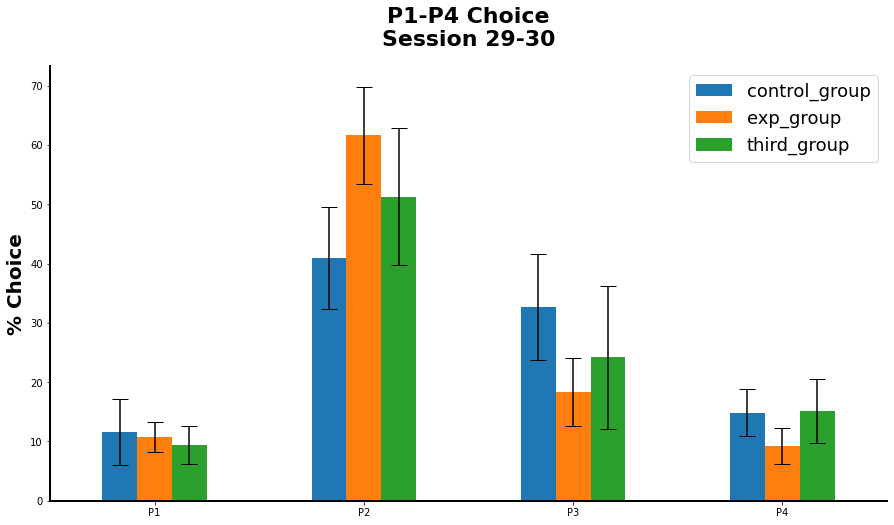

In [21]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


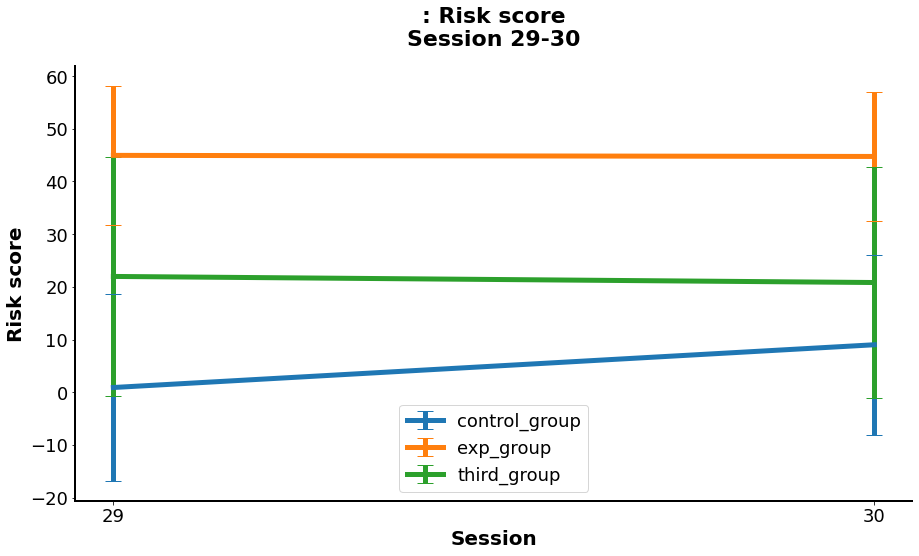

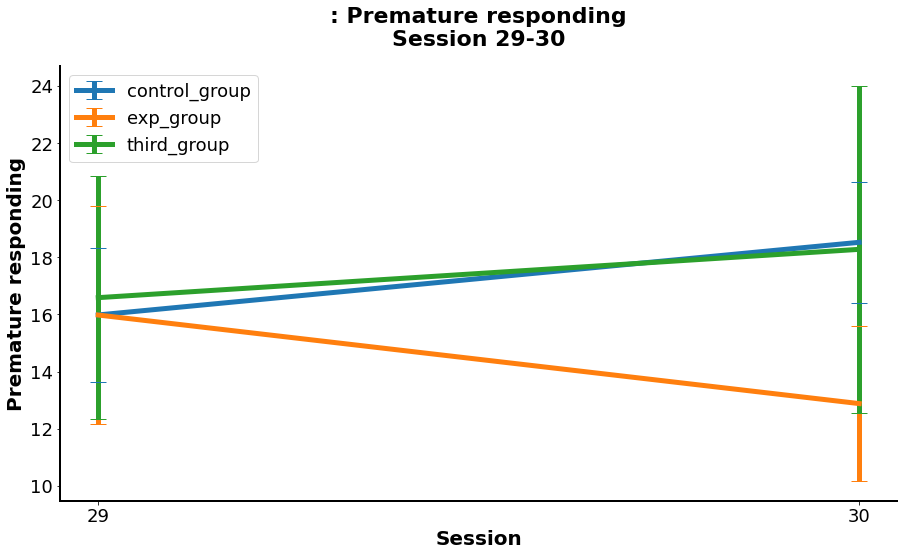

In [22]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



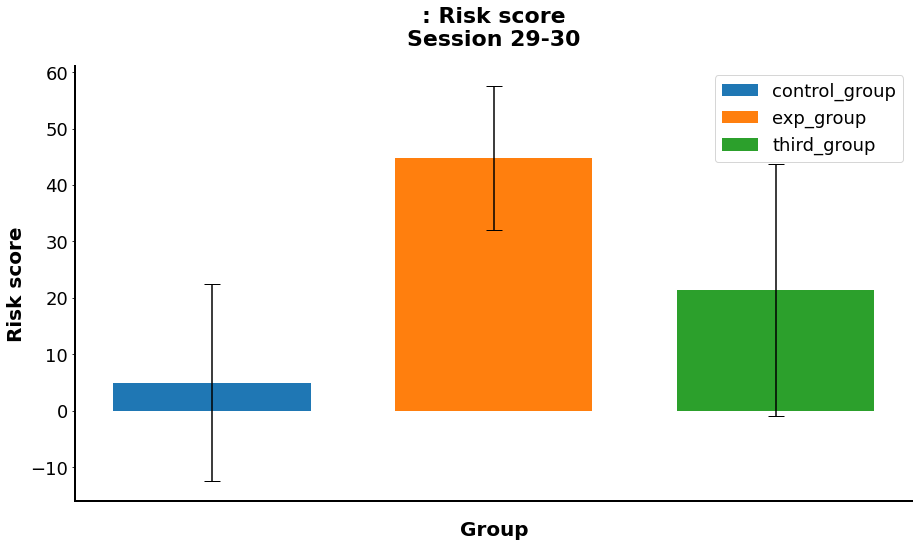

In [23]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')

## Plotting by risk status 

In [24]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

NameError: name 'mean_scores_risk' is not defined

In [ ]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')